## TASK-1 TITANIC SURVIVAL PREDICTION

MADHUNISHA.M
### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import math


### Importing the Dataset

In [2]:
titanic=pd.read_csv('tested.csv')


In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic.shape

(418, 12)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
 titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Analysing Data

<Axes: xlabel='Survived', ylabel='count'>

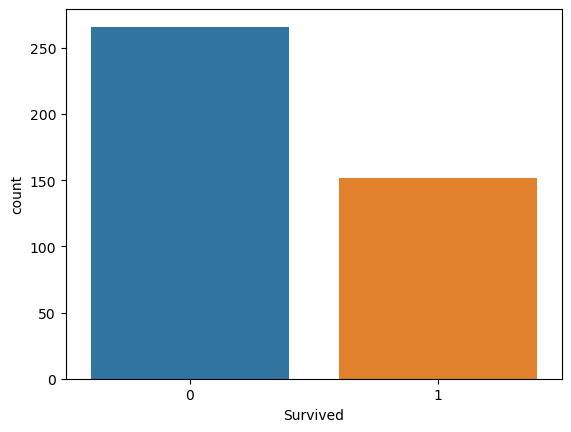

In [9]:
sns.countplot(x='Survived',data=titanic) 

<Axes: xlabel='Survived', ylabel='count'>

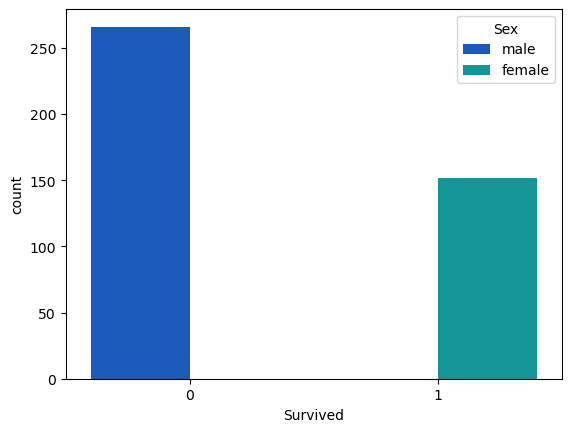

In [10]:
sns.countplot(x='Survived',hue='Sex',data=titanic, palette='winter')

### Data wrangling

In [13]:
#check how many values are null

In [14]:
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
#visualize the values


<Axes: >

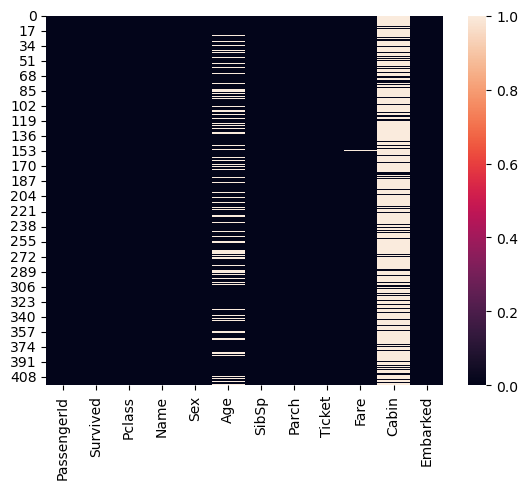

In [16]:
sns.heatmap(titanic.isna())

<Axes: xlabel='Pclass', ylabel='Age'>

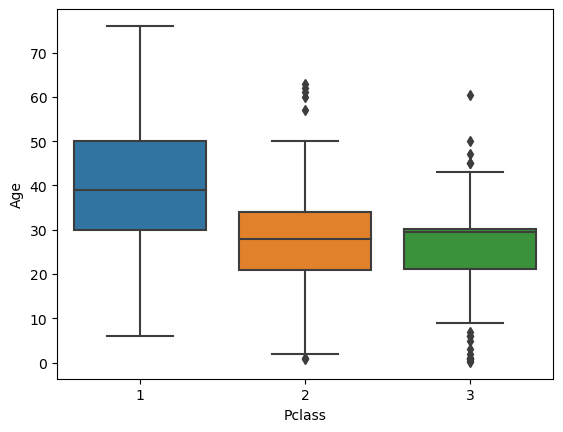

In [56]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [17]:
#find the % of null values in age column

In [18]:
(titanic['Age'].isna().sum()/len(titanic['Age']))*100

20.574162679425836

In [19]:
#find the % of null values in cabin column

In [20]:
(titanic['Cabin'].isna().sum()/len(titanic['Cabin']))*100

78.22966507177034

In [21]:
#find the distribution for age column

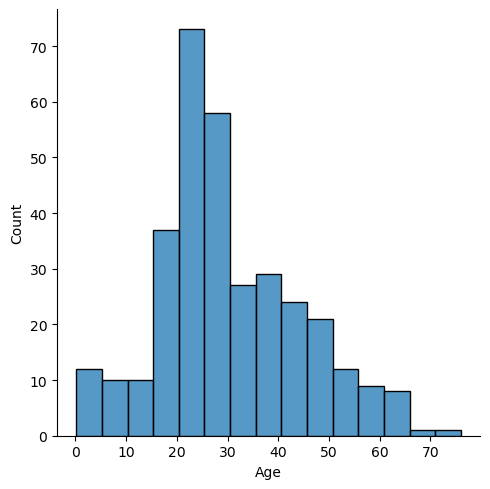

In [22]:
sns.displot(x='Age',data=titanic)

In [23]:
#fill age column

In [24]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [25]:
#verify null values

In [26]:
titanic['Age'].isnull().sum()

0

In [27]:
#visualize null values

<Axes: >

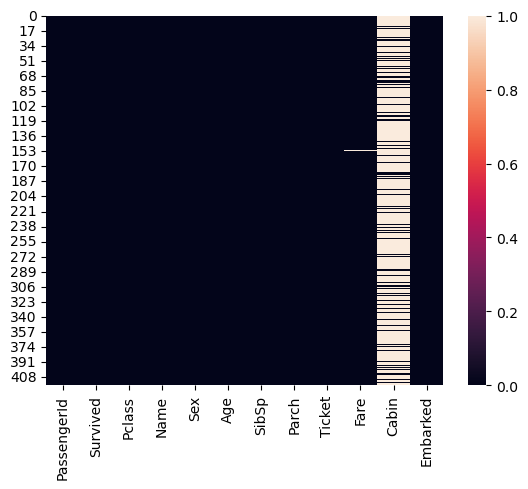

In [28]:
sns.heatmap(titanic.isna())

In [29]:
titanic['Fare'].fillna(titanic['Fare'].mean(),inplace=True)

In [30]:
titanic['Fare'].isnull().sum()

0

<Axes: >

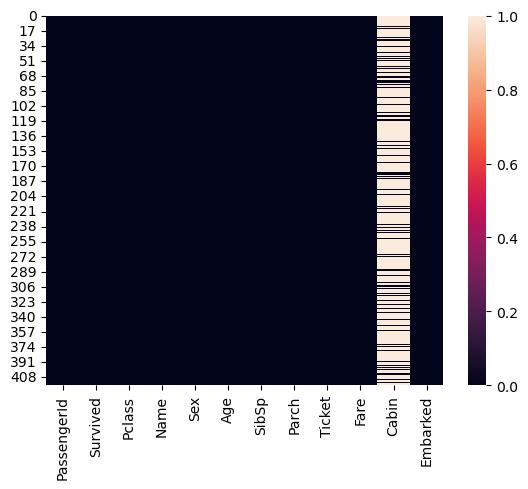

In [31]:
sns.heatmap(titanic.isna())

### We can see cabin column has a number of null values,as such we can not use it for prediction.Hence we will drop it .

In [32]:
#drop cabin column

In [33]:
titanic.drop('Cabin',axis=1,inplace=True)

In [34]:
#see the contents of data

In [35]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


## Preparing Data for Model
convert all non-numerical columns to numeric.

In [36]:
#Check for the non-numeric  column

In [37]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [38]:
#convert sex column to numeric values

In [39]:
gender=pd.get_dummies(titanic['Sex'],drop_first=True)

In [40]:
titanic['Gender']=gender

In [41]:
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [42]:
titanic.replace({'Embarked':{'S':0,'C':1,'Q':3}},inplace=True)

In [43]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,3,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,3,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,0


In [44]:
#drop the columns which are not required

In [45]:
titanic.drop(['Name','PassengerId','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [46]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,34.5,0,0,7.8292,1
1,1,3,47.0,1,0,7.0000,0
2,0,2,62.0,0,0,9.6875,1
3,0,3,27.0,0,0,8.6625,1
4,1,3,22.0,1,1,12.2875,0


### Train Data

In [47]:
X=titanic.drop('Survived',axis=1)
y=titanic['Survived']

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=4)

## Logistic Regression

In [49]:
lm=LogisticRegression()

In [50]:
lm.fit(X_train,y_train)

LogisticRegression()

In [51]:
pred=lm.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test,pred)

array([[84,  0],
       [ 0, 54]], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score


In [55]:
accuracy_score(y_test,pred)

1.0